In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

## Import data 

In [10]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_american_clean.xlsx')

In [11]:
df_american = df_american.set_index(['date'])

In [12]:
X = df_american[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [13]:
y = df_american['pax_count'].values

## Train & test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Normalize the data

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

## Creating the model 

In [45]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(units=1,activation='relu'))

model.compile(loss = 'mean_absolute_error', optimizer= 'adam')

## Fit the model 

In [46]:
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 2s 60ms/step - loss: 8841790.0000 - val_loss: 8679891.0000
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 8841790.0000 - val_loss: 8679891.0000
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 8841791.0000 - val_loss: 8679891.0000
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 8841791.0000 - val_loss: 8679891.0000
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 8841792.0000 - val_loss: 8679891.0000
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 8841792.0000 - val_loss: 8679891.0000
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 8841791.0000 - val_loss: 8679891.0000
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 8841792.0000 - val_loss: 8679891.0000
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 8841791.0000 - val_loss: 8679891.0000
Epoch 10/1

Epoch 75/100
6/6 [==============================] - 0s 16ms/step - loss: 8841665.0000 - val_loss: 8679761.0000
Epoch 76/100
6/6 [==============================] - 0s 20ms/step - loss: 8841657.0000 - val_loss: 8679753.0000
Epoch 77/100
6/6 [==============================] - 0s 25ms/step - loss: 8841648.0000 - val_loss: 8679744.0000
Epoch 78/100
6/6 [==============================] - 0s 18ms/step - loss: 8841638.0000 - val_loss: 8679733.0000
Epoch 79/100
6/6 [==============================] - 0s 14ms/step - loss: 8841627.0000 - val_loss: 8679724.0000
Epoch 80/100
6/6 [==============================] - 0s 20ms/step - loss: 8841616.0000 - val_loss: 8679713.0000
Epoch 81/100
6/6 [==============================] - 0s 17ms/step - loss: 8841605.0000 - val_loss: 8679701.0000
Epoch 82/100
6/6 [==============================] - 0s 13ms/step - loss: 8841594.0000 - val_loss: 8679689.0000
Epoch 83/100
6/6 [==============================] - 0s 14ms/step - loss: 8841581.0000 - val_loss: 8679678.0000
E

In [47]:
losses = pd.DataFrame(model.history.history)

In [48]:
losses

,loss,val_loss
0,8841790.0,8679891.0
1,8841790.0,8679891.0
2,8841791.0,8679891.0
3,8841791.0,8679891.0
4,8841792.0,8679891.0
...,...,...
95,8841355.0,8679452.0
96,8841333.0,8679427.0
97,8841308.0,8679404.0
98,8841282.0,8679378.0


<AxesSubplot:>

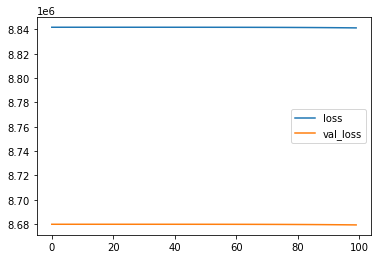

In [49]:
losses.plot()

In [50]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [51]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 8)                 40        
                                                                 
 dense_23 (Dense)            (None, 5)                 45        
                                                                 
 dense_24 (Dense)            (None, 3)                 18        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Layer:  dense_21
  --Kernels (Weights):  [array([[-0.726

In [52]:
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 8979916.21 RMSE


In [53]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 8979916.21 RMSE


In [54]:
def plot_american(actual, predictions):
    title = 'Sales Predictions Store '
    act = plt.plot(actual, color='turquoise', label='Actual')
    pred = plt.plot(predictions, color='darkgoldenrod', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

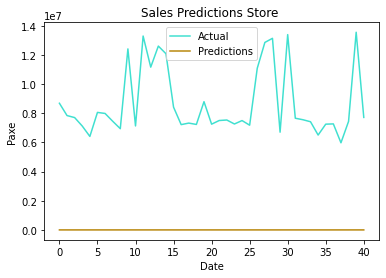

In [55]:
plot_american(y_test, testPredict)